In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Now let's create the dataset in the same way and try multiple different models.

In [6]:
X = np.arange(0., 10., 0.05).reshape(-1, 1)
print(f'features shape: {X.shape}')
print(X[:10])

features shape: (200, 1)
[[0.  ]
 [0.05]
 [0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]
 [0.4 ]
 [0.45]]


In [7]:
a            = 3.5
b            = -1.4
noise_vector = np.random.normal(0, 5, X.shape[0])
y            = a * X[:, 0] + noise_vector + b
y.shape

(200,)

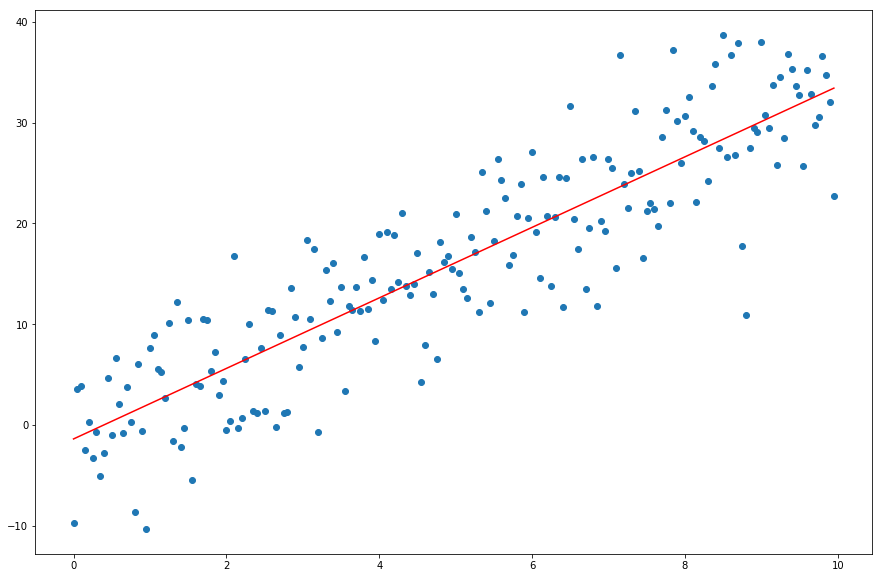

In [8]:
plt.figure(figsize = (15, 10))
plt.scatter(X, y)
plt.plot(X, a * X + b, color = 'red')

A lot of different machine learning models exist. Many of them are presented through a unified interface in `scikit-learn` making it extremely easy to experiment. Let's try a few and visualize how each model understands the structure of the dataset.

In [9]:
lr = LinearRegression()
lr.fit(X, y)
rf = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 4)
rf.fit(X, y)
svr = SVR()
svr.fit(X, y)
lasso = Lasso()
lasso.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

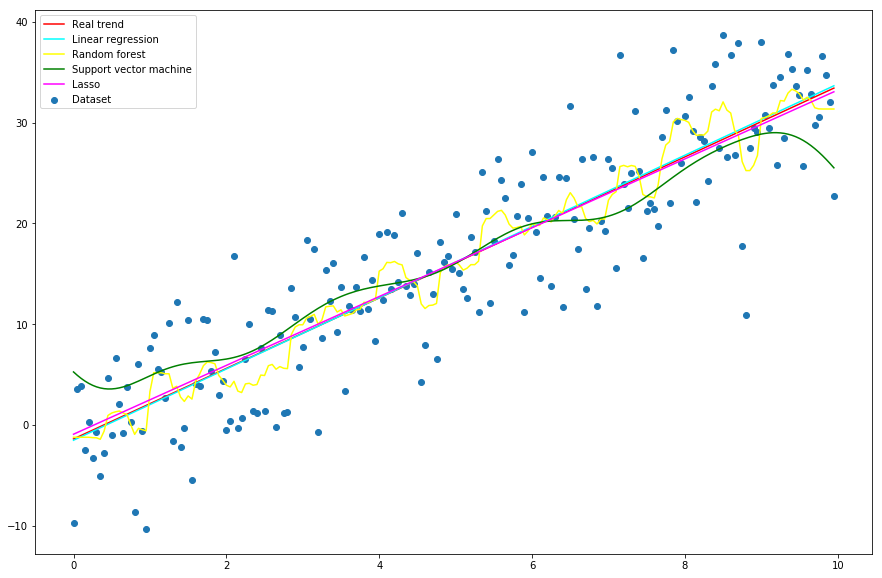

In [37]:
plt.figure(figsize = (15, 10))
plt.scatter(X, y, label = 'Dataset')
plt.plot(X, a * X + b     , color = 'red'   , label = 'Real trend')
plt.plot(X, lr.predict(X) , color = 'cyan'  , label = 'Linear regression')
plt.plot(X, rf.predict(X) , color = 'yellow', label = 'Random forest')
plt.plot(X, svr.predict(X), color = 'green' , label = 'Support vector machine')
plt.plot(X, lasso.predict(X), color = 'magenta' , label = 'Lasso')
plt.legend()

In [39]:
print(f'Linear regression loss {mean_absolute_error(y, lr.predict(X))}')
print(f'Random forest loss {mean_absolute_error(y, rf.predict(X))}')
print(f'Support vector machine loss {mean_absolute_error(y, svr.predict(X))}')
print(f'Lasso loss {mean_absolute_error(y, lasso.predict(X))}')

Linear regression loss 4.112020719610175
Random forest loss 3.5528193396019447
Support vector machine loss 4.391295602650282
Lasso loss 4.127131875908338
